# UVU Operations Management -- Simulation 1
*MGMT 3450

This is an ancilliary data analysis of the given data for Simulation 1 to see if any regression tests yield a formula that can be optimized. The goal for now is not to drive factory floor changes but to confirm whether they can be supported using mathematical methods. Future work would include using given data as a test data set and comparing the "do nothing" data from days 51+ to see how closely it fits the regression line.

If this is productive then other scenarios can be backtested on simulation 2 and the best scenarios can be applied to the live time.

## Your Data
Fill out the following information: 

*First Name:*  James 
*Last Name:*   Lohse
*E-mail:*   10657200@my.uvu.edu 

# Group x4 (check this, is this right?)

## Part 1: Regression of supplied factory floor data
In the simulation, data can be downloaded. It was collected into a single document with columns for each data set. The goal here is to read the data into a dataframe, treat the inputs as dependent variables and the production output as the independent variable. We will see if this yield usable beta values and produces an equation, and help identify which dependent variable has the closest correlation with the output. 


### 1.1 Import the data 
Use the pandas.read_csv() function to import the dataset. 

In [37]:
# imports and setup 
import pandas as pd
import scipy as sc

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 

plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [38]:
# Your code here
import numpy as np
import sys

# take the columns from CSV file headers

train1 = pd.read_csv('S1dataCSVfile.csv',thousands=',',usecols=['dayNum', 'jobsAccepted', 'jobsQueued', 'kitInventory', 's1DailyAvg', 's2KitsQd', 's3UtilAvg', 'eodCash', 'compJobs', 'jobLeadDailyAvg', 'dailyAvgRevByJob'])

print(train1.shape)

train1ColNames = train1.columns.values

# export this for a look
train1.to_csv('train1.csv')

train1ColNames


(52, 11)


array(['dayNum', 'jobsAccepted', 'jobsQueued', 'kitInventory',
       's1DailyAvg', 's2KitsQd', 's3UtilAvg', 'eodCash', 'compJobs',
       'jobLeadDailyAvg', 'dailyAvgRevByJob'], dtype=object)

### 1.2 Clean the data 

1. NOTE: On day 44 there were three values supplied for kitInventory. Presumably the teacher purchased some kits in the pre-simulation. For simplicity the assumption that 10440 was the end of day inventory is used. This could be the wrong way to look at it so we need to consult the Professor to see what his actions were here and how he suggests we handle this.

2. This item on day 44 is the only case where multiple values are given, this was done in the CSV before importing

3. Although the CSV file has some data for days past 50 we are not looking beyond day 50 so we limit the regression test to the supplied data, not data generated during the live simulation.

In [39]:

# NOTE generally it appears that pandas reads in and converts values to numeric with some exceptions
# but we do explicit conversions to be sure

# remove "outliers" which is days past 50

train1 = train1[(train1['dayNum'] < 51)]

print("Shape without extra days over 50 outliers is now ",train1.shape)

# just to be sure...

# to int for ints: 'dayNum', 'jobsAccepted', 'jobsQueued', 'kitInventory', 's2KitsQd', 'compJobs'
train1[0:3] = train1[0:3].astype(int, raise_on_error=False)
# not working figure out why, not too critical so fix later, log bug

# double check the dtypes
print(train1.dtypes)

Shape without extra days over 50 outliers is now  (50, 11)
dayNum              float64
jobsAccepted        float64
jobsQueued          float64
kitInventory        float64
s1DailyAvg          float64
s2KitsQd            float64
s3UtilAvg           float64
eodCash             float64
compJobs              int64
jobLeadDailyAvg     float64
dailyAvgRevByJob    float64
dtype: object


### 1.3 Exploratory data analysis 

1. Explore the dataset. Write a short description of the dataset describing the number of items, the number of variables and check to see if the values are reasonable.  

+ Compute the correlation matrix and make a scatter plot matrix to visualize the correlations. Determine which columns have strong correlations. Write a few (complete) sentences describing your findings. 


In [40]:
# autolabel function is from matplotlib demos at
# http://matplotlib.org/examples/api/barchart_demo.html

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

# After cleaning we are left with a pandas dataframe called train1 with 50 rows and 11 columns.
# The columns are: train1['dayNum', 'jobsAccepted', 'jobsQueued', 'kitInventory',
#       's1DailyAvg', 's2KitsQd', 's3UtilAvg', 'eodCash', 'compJobs',
#       'jobLeadDailyAvg', 'dailyAvgRevByJob']


colNum = 0
print("We have a dataframe named train1 of shape: ",train1.shape)
print("That's rows, and columns, rows are datapoints and columns are variables")

print("")
# now see if a column is amenable to statistical analysis for outliers
typesToDoStatsOn = ['numpy.int64','numpy.float64']
# if colType in typesToDoStatsOn:  
    
# wrote my own dtypes here before I realized dtypes exists
for column in train1:
    colNum +=1
    train1Column = train1[column]
    colType = type(train1Column.values[0])
    
    
# the if above needs work, just explicitly check for int and float
# report outlier values outside three standard deviations but not for str values
    if 'str' not in colType.__name__:
        currentColLen = len(train1[column])
        train1ColMean = train1[column].mean()
        train1ColStdDev = train1[column].std()
        within3ColLen = len(train1[(train1[column] - train1ColMean) < train1ColMean + 3*train1ColStdDev])
        print("Column ", colNum, ": ",column, " type: ", colType, " and ", currentColLen - within3ColLen, " vals outside 3 stddev")
    else:
        print("Column ", colNum, ": ",column, " type: ", colType)
        print( "This column is not int or float, skipping outliers check")
        
print("")
print("While some columns have data outside three standard deviations, these cases are reasonable")


    

    
    

We have a dataframe named train1 of shape:  (50, 11)
That's rows, and columns, rows are datapoints and columns are variables

Column  1 :  dayNum  type:  <class 'numpy.float64'>  and  0  vals outside 3 stddev
Column  2 :  jobsAccepted  type:  <class 'numpy.float64'>  and  0  vals outside 3 stddev
Column  3 :  jobsQueued  type:  <class 'numpy.float64'>  and  50  vals outside 3 stddev
Column  4 :  kitInventory  type:  <class 'numpy.float64'>  and  0  vals outside 3 stddev
Column  5 :  s1DailyAvg  type:  <class 'numpy.float64'>  and  0  vals outside 3 stddev
Column  6 :  s2KitsQd  type:  <class 'numpy.float64'>  and  0  vals outside 3 stddev
Column  7 :  s3UtilAvg  type:  <class 'numpy.float64'>  and  0  vals outside 3 stddev
Column  8 :  eodCash  type:  <class 'numpy.float64'>  and  0  vals outside 3 stddev
Column  9 :  compJobs  type:  <class 'numpy.int64'>  and  0  vals outside 3 stddev
Column  10 :  jobLeadDailyAvg  type:  <class 'numpy.float64'>  and  0  vals outside 3 stddev
Column 

                    dayNum  jobsAccepted  jobsQueued  kitInventory  \
dayNum            1.000000      0.342690         NaN     -0.301857   
jobsAccepted      0.342690      1.000000         NaN     -0.165333   
jobsQueued             NaN           NaN         NaN           NaN   
kitInventory     -0.301857     -0.165333         NaN      1.000000   
s1DailyAvg        0.433651      0.478369         NaN     -0.204602   
s2KitsQd          0.056046      0.210603         NaN      0.073636   
s3UtilAvg         0.056046      0.210603         NaN      0.073636   
eodCash           0.725721      0.220114         NaN     -0.600620   
compJobs          0.492830      0.415160         NaN     -0.215084   
jobLeadDailyAvg   0.630419      0.233791         NaN     -0.296549   
dailyAvgRevByJob  0.249995      0.283794         NaN     -0.162726   

                  s1DailyAvg  s2KitsQd  s3UtilAvg   eodCash  compJobs  \
dayNum              0.433651  0.056046   0.056046  0.725721  0.492830   
jobsAccepted 

/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


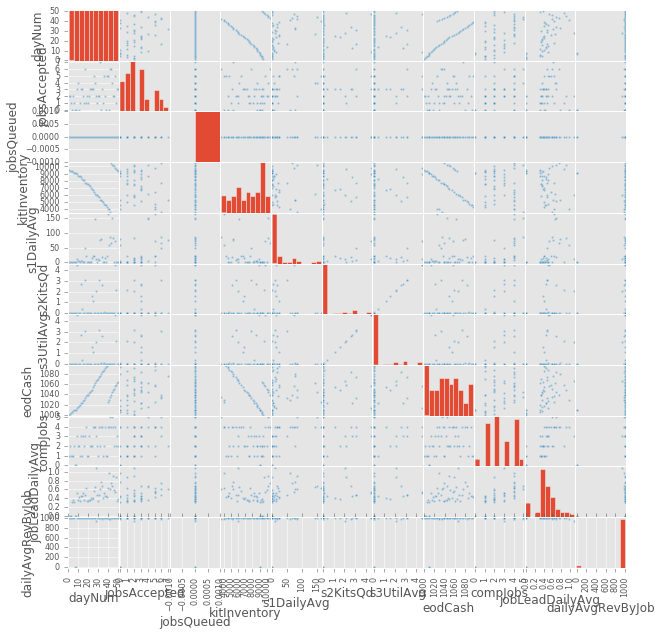

In [41]:
# now a corr matrix and scatterplot based on ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']

train1CorrCols = train1[['dayNum', 'jobsAccepted', 'jobsQueued', 'kitInventory', 's1DailyAvg', 's2KitsQd', 's3UtilAvg', 'eodCash', 'compJobs', 'jobLeadDailyAvg', 'dailyAvgRevByJob']]

print(train1CorrCols.corr())
pd.scatter_matrix(train1CorrCols, figsize=(10, 10), diagonal='hist'); #; suppresses output

**Your Interpretation:**
1. s1DailyAvg and compJobs are weakly correlated with jobs completed
2. there is an interesting negative correction between kitInventory and eodCash, suggesting the leaner the operation the more cash on hand. This is pretty obvious but it's good too see this reinforced here
3. eodCash strongly correlated with dayNum, not too interesting as the day of the week alone means little toward cash levels, it's what we do on that day that matters


NOTE: Nothing is too interesting here so this probably means this evaluation is not that valuable, there is no magic correlation. Look at how the ints are not being cast to ints properly, that might change things. Discuss the statistics behind the simulation with the Professor to improve analysis for Simulation 2



### 1.5 Simple  Linear Regression 

There are two dependent variables of interest: Average RPU (dailyAvgRevByJob) and End Of Day Cash (eodCash)

Use the 'ols' function from the [statsmodels](http://www.statsmodels.org/stable/index.html) package to regress these two depVars on the other variables. 

The model is of the form:
$$
\text{Sold Price} = \beta_0 + \beta_1 x, 
$$
where $x$ is one of the other variables. 

We want to look at all station performance, for now, we look at s1DailyAvg vs. dailyAvgRevByJob.

We report the R-squared value for this model (s1DailyAvg ~ dailyAvgRevByJob) and give an interpretation for its meaning. Also we give an interpretation of $\beta_1$ for this model. Make a plot of s1DailyAvg vs. dailyAvgRevByJob and overlay the prediction coming from your regression model. 

                            OLS Regression Results                            
Dep. Variable:             s1DailyAvg   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7177
Date:                Sat, 04 Feb 2017   Prob (F-statistic):              0.401
Time:                        17:59:27   Log-Likelihood:                -256.45
No. Observations:                  50   AIC:                             516.9
Df Residuals:                      48   BIC:                             520.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.1733     29.460  

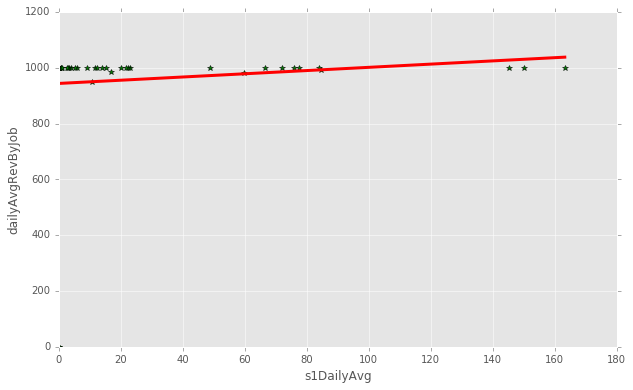

The model is:
             dailyAvgRevByJob = 943.9108 + 0.5772 * dailyAvgRevByJob.
r-squared value = 0.0147 (measure of fit)
p-value = 0.4011 (H_0: slope is zero.)
standard error = 0.6814


In [42]:
# Your code here

from scipy.stats import linregress
import matplotlib as regrPlot

# make s1DailyAvg and dailyAvgRevByJob from train1 dataframe
s1DailyAvg = train1['s1DailyAvg']
dailyAvgRevByJob = train1['dailyAvgRevByJob']

model = sm.ols(formula="s1DailyAvg ~ dailyAvgRevByJob", data=train1)
model_result = model.fit()
print(model_result.summary());

plt.plot(s1DailyAvg,dailyAvgRevByJob,'g*')

# adapted from http://localhost:8843/notebooks/05-linear-regression.ipynb cell 
# and http://localhost:8869/notebooks/06-regression-2.ipynb
lrs1DailyAvgTodailyAvgRevByJob = linregress(x=s1DailyAvg, y=dailyAvgRevByJob)
print(lrs1DailyAvgTodailyAvgRevByJob)

x = sc.linspace(0,max(s1DailyAvg),1000)

# the stats version of y = mx + b
plt.plot(x,lrs1DailyAvgTodailyAvgRevByJob.intercept + lrs1DailyAvgTodailyAvgRevByJob.slope*x,'r',linewidth=3)
plt.xlabel('s1DailyAvg')
plt.ylabel('dailyAvgRevByJob')
plt.show()

print('The model is:') 


print('             dailyAvgRevByJob = ' + str(round(lrs1DailyAvgTodailyAvgRevByJob.intercept,4)) + ' + ' + str(round(lrs1DailyAvgTodailyAvgRevByJob.slope,4)) + ' * dailyAvgRevByJob.')
print("r-squared value = " + str(round(lrs1DailyAvgTodailyAvgRevByJob.rvalue**2,4)) + " (measure of fit)")
print("p-value = " + str(round(lrs1DailyAvgTodailyAvgRevByJob.pvalue,4)) + " (H_0: slope is zero.)")
print("standard error = " + str(round(lrs1DailyAvgTodailyAvgRevByJob.stderr,4)))

**Your Interpretation:** Need help interpreting the value of this approach. This is showing a very low R-Squared value. The fact that dailyAvgRevByJob is almost always a full 1000 means there are only a few datapoints that make this regression line have any slope. Perhaps in the narrow case in front of us, it's more valuable to look at the specific days where the revenue per job fell below 1000 and isolate why this is the case.

This seems like a case where, to use stock market terminology, the technical analysis of looking at charts is failing and Josef's approach, much like fundamental analysis, is the better approach. Since he does this for a living that's probably the case but it was fun breaking out my stats and Python skills and leads to a lot of interesting questions.

### 1.6 Multilinear Regression 
Develop a multilinear regression model for Simulation 1
\text{Sold Price} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots +  \beta_n x_n, 
$$
where $x_i$ are predictive variables. Which variables are the best predictors for the Sold Price? 

Specific questions:
1. If we simply take the numbers on each station as a dependent variable in the model, what do we use as the independent variable?

ANSWER: Cash is King, run a model with s1DailyAvg, s2KitsQd, and s3UtilAvg as dependent and eodCash as independent. 

NOTE: In the future it would be interesting to use PCA on all variables and normalize the values in some meaningful way. If this analysis is desired on Simulation 2, it would be good to discuss with the Professor and Josef.


In [43]:
# refers to totSqFt, garageCap, latTude, longTude created above

model = sm.ols(formula="eodCash ~ s1DailyAvg + s2KitsQd + s3UtilAvg", data=train1)

# in the future it might be interesting to put jobsAccepted  jobsQueued  kitInventory in the model but let's not 
# overcomplicate things for now

model_result = model.fit()
print(model_result.params)
print(model_result.summary())

Intercept     1041.289983
s1DailyAvg       0.079360
s2KitsQd         0.719376
s3UtilAvg        0.719376
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                eodCash   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.4571
Date:                Sat, 04 Feb 2017   Prob (F-statistic):              0.636
Time:                        17:59:29   Log-Likelihood:                -234.69
No. Observations:                  50   AIC:                             475.4
Df Residuals:                      47   BIC:                             481.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------

**Your Interpretation:** 
1. Again this analysis does not seem to be giving much meaningful. Need to understand better how these stats methods relate to the data at hand, probably a GIGO problem :)

In [45]:
# doing a correlation matrix and scatter matrix for the extra info

print(train1.corr())
# pd.scatter_matrix(train1, figsize=(10, 10), diagonal='kde');

# GOT A BUG TO FIX IN THE SCATTER GRAPH, WRONG MATRIX TYPE, FIX LATER

                    dayNum  jobsAccepted  jobsQueued  kitInventory  \
dayNum            1.000000      0.342690         NaN     -0.301857   
jobsAccepted      0.342690      1.000000         NaN     -0.165333   
jobsQueued             NaN           NaN         NaN           NaN   
kitInventory     -0.301857     -0.165333         NaN      1.000000   
s1DailyAvg        0.433651      0.478369         NaN     -0.204602   
s2KitsQd          0.056046      0.210603         NaN      0.073636   
s3UtilAvg         0.056046      0.210603         NaN      0.073636   
eodCash           0.725721      0.220114         NaN     -0.600620   
compJobs          0.492830      0.415160         NaN     -0.215084   
jobLeadDailyAvg   0.630419      0.233791         NaN     -0.296549   
dailyAvgRevByJob  0.249995      0.283794         NaN     -0.162726   

                  s1DailyAvg  s2KitsQd  s3UtilAvg   eodCash  compJobs  \
dayNum              0.433651  0.056046   0.056046  0.725721  0.492830   
jobsAccepted 